In [1]:
%load_ext rpy2.ipython

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


R[write to console]: Loading required package: svd

R[write to console]: Loading required package: forecast

R[write to console]: Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

R[write to console]: This is forecast 8.17.0 
  Crossvalidated is a great place to get help on forecasting issues:
  http://stats.stackexchange.com/tags/forecasting.

R[write to console]: 
Attaching package: ‘Rssa’


R[write to console]: The following object is masked from ‘package:stats’:

    decompose




[1] 37.87815


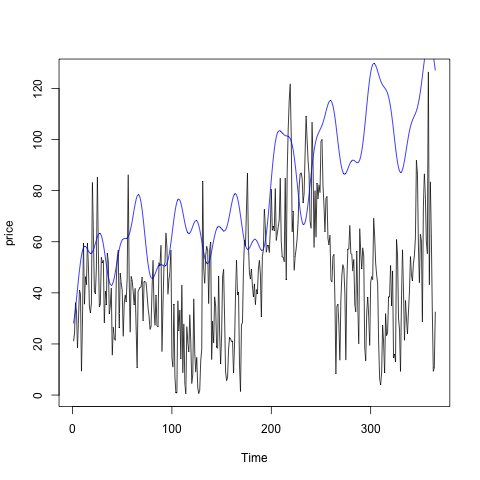

In [2]:
%%R
library(Rssa)

df = read.csv('final_daily.csv')

price_test = tail(df["price"], 365)
price_train = head(df["price"], length(ts(df['price'])) - 365)

s <- ssa(price_train)
for1 <- rforecast(s, groups = list(trend = c(1:12)), len = 365, recurrent=TRUE)

#for1 = exp(for1)
plot(ts(price_test))
lines(ts(for1), col='blue')

mean((ts(for1) - ts(price_test)**2))

mean(abs(ts(for1) - ts(price_test)))

In [3]:
%%R
error = abs(ts(price_test)-ts(for1))/abs(ts(price_test))
error[error > 1] = 1
mean(error)

[1] 0.6388409


[1] 23351.09


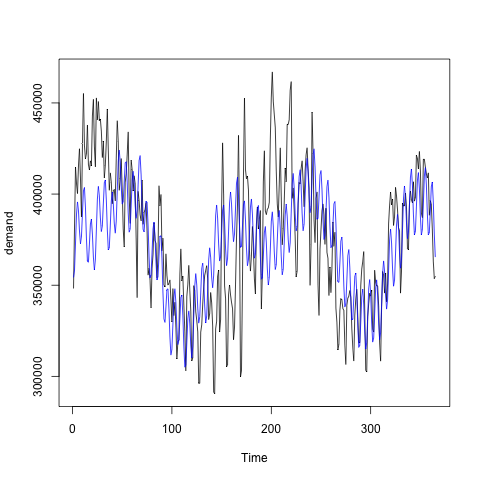

In [4]:
%%R
##Demand

demand_test = tail(df["demand"], 365)
demand_train = head(df["demand"], length(ts(df['demand'])) - 365)

s <- ssa(demand_train)
for1 <- rforecast(s, groups = list(trend = c(1:12)), len = 365, recurrent=TRUE)

plot(ts(demand_test))
lines(ts(for1), col='blue')

mean((ts(for1) - ts(demand_test))**2)

mean(abs(ts(for1) - ts(demand_test)))

In [5]:
%%R
error = abs(ts(demand_test)-ts(for1))/abs(ts(demand_test))
error[error > 1] = 1
mean(error)

[1] 0.06180689
